# **1. Perkenalan Dataset**


# **Proyek Klasifikasi: Telco Customer Churn**

## **Informasi Proyek**
- **Nama:** SHAH FIRIZKI AZMI
- **Email:** [Masukkan email Anda di sini]
- **ID Dicoding:** [Masukkan username Dicoding Anda di sini]
- **Dataset:** Telco Customer Churn Dataset
- **Task:** Binary Classification (Churn Prediction)

## **Deskripsi Dataset**
Dataset ini berisi informasi pelanggan telekomunikasi untuk memprediksi apakah pelanggan akan berhenti berlangganan (churn) atau tidak. Dataset ini memiliki:

### **Sumber Dataset:**
- **Nama Dataset:** WA_Fn-UseC_-Telco-Customer-Churn.csv
- **Source:** IBM Sample Dataset
- **Problem Type:** Binary Classification
- **Target Variable:** Churn (Yes/No)

### **Karakteristik Dataset:**
- **Jumlah Records:** 7,043 records
- **Jumlah Features:** 20 columns (19 features + 1 target)
- **Missing Values:** Ada pada kolom TotalCharges
- **Class Distribution:** Imbalanced (lebih banyak non-churn)

### **Fitur-fitur Utama:**
1. **Demographic Info:** Gender, SeniorCitizen, Partner, Dependents
2. **Services Info:** PhoneService, MultipleLines, InternetService, OnlineSecurity, etc.
3. **Account Info:** Contract, PaperlessBilling, PaymentMethod, tenure
4. **Charges:** MonthlyCharges, TotalCharges
5. **Target:** Churn (0: No, 1: Yes)

### **Business Objective:**
Memprediksi pelanggan yang berpotensi churn untuk meningkatkan customer retention dan mengurangi kehilangan revenue.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset shape:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (7043, 21)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod       

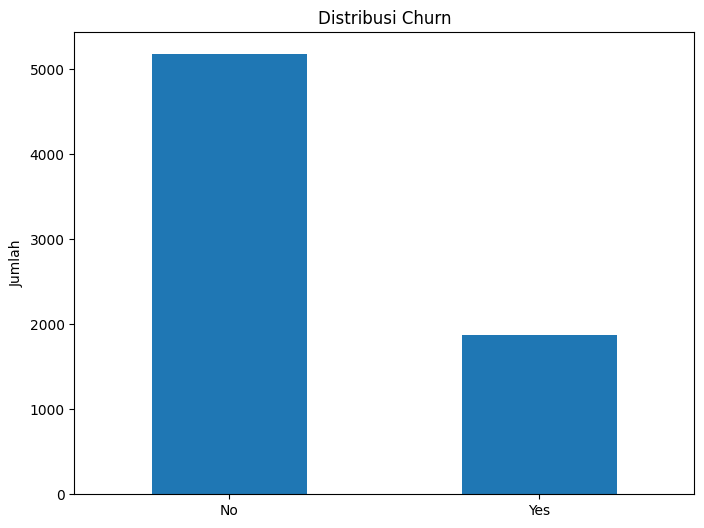

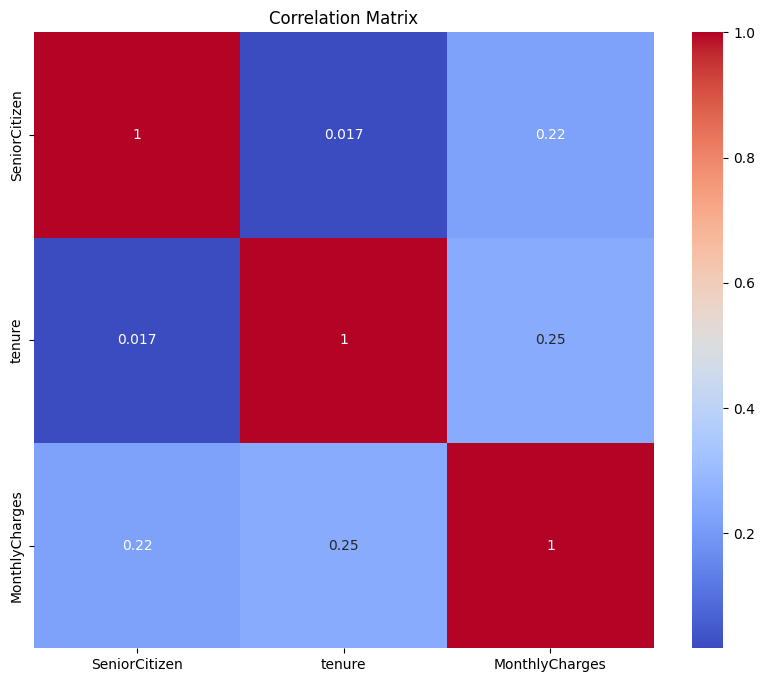

In [10]:
print("Missing values:")
print(df.isnull().sum())

# Cek data types
print("\nData types:")
print(df.dtypes)

# Cek unique values untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].unique()}")

# Distribusi target variable
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribusi Churn')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# Correlation heatmap untuk numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
### Data Preprocessing

# Handle missing values (TotalCharges memiliki spasi kosong)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID karena tidak relevan untuk prediksi
df = df.drop('customerID', axis=1)

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col != 'customerID':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print("Data setelah preprocessing:")
print(df.head())
print("\nShape setelah preprocessing:", df.shape)


Data setelah preprocessing:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0    

In [12]:
#### Split Dataset
# Pisahkan features dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (5634, 19)
Test set shape: (1409, 19)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



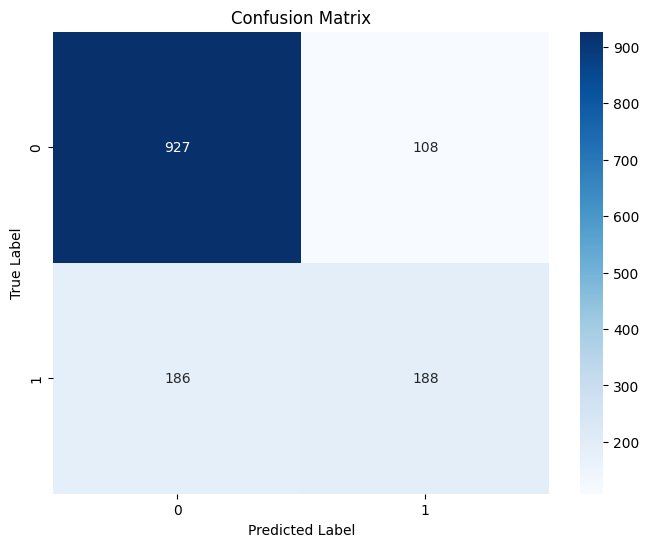

In [13]:
## Modelling
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

## Evaluasi dan Visualisasi
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

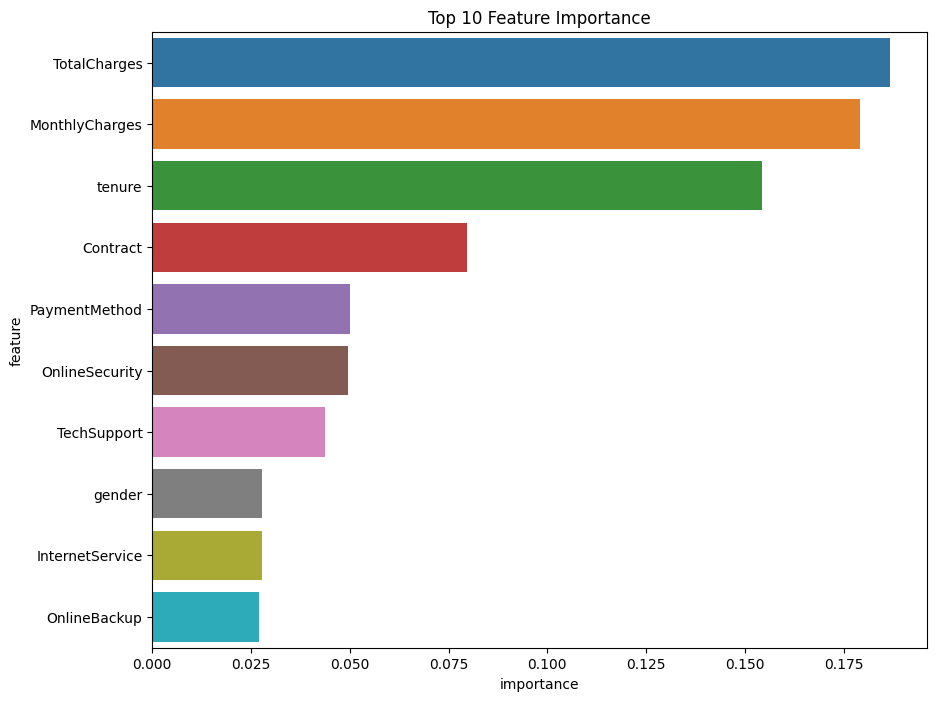

Preprocessed data saved!


In [15]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.show()

# Save preprocessed data
processed_df = df.copy()
processed_df.to_csv('preprocessing/telco_churn_preprocessing.csv', index=False)
print("Preprocessed data saved!")